In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt
# Load data
df = pd.read_csv('GOOGL.csv')
df['Date'] = pd.to_datetime(df['Date'])
close_prices = df['Close']

In [2]:
# Define the start and end dates
start_date = dt.datetime.now()
end_date = start_date + dt.timedelta(days=30)
# Generate a date range excluding weekends
date_range = pd.bdate_range(start=start_date, end=end_date)

In [3]:
# Fit ARIMA model and forecast
model = ARIMA(close_prices, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()
forecast_steps = len(date_range)
forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean

In [4]:
# Create a forecast series
forecast_series = pd.Series(forecast.values, index=date_range)

In [5]:
# Example: Simple moving average crossover to determine buy/sell signals
short_window = 5
long_window = 20

# Calculate moving averages
short_mavg = close_prices.rolling(window=short_window, min_periods=1).mean()
long_mavg = close_prices.rolling(window=long_window, min_periods=1).mean()

# Generate signals
buy_signals = (short_mavg > long_mavg) & (short_mavg.shift(1) <= long_mavg.shift(1))
sell_signals = (short_mavg < long_mavg) & (short_mavg.shift(1) >= long_mavg.shift(1))


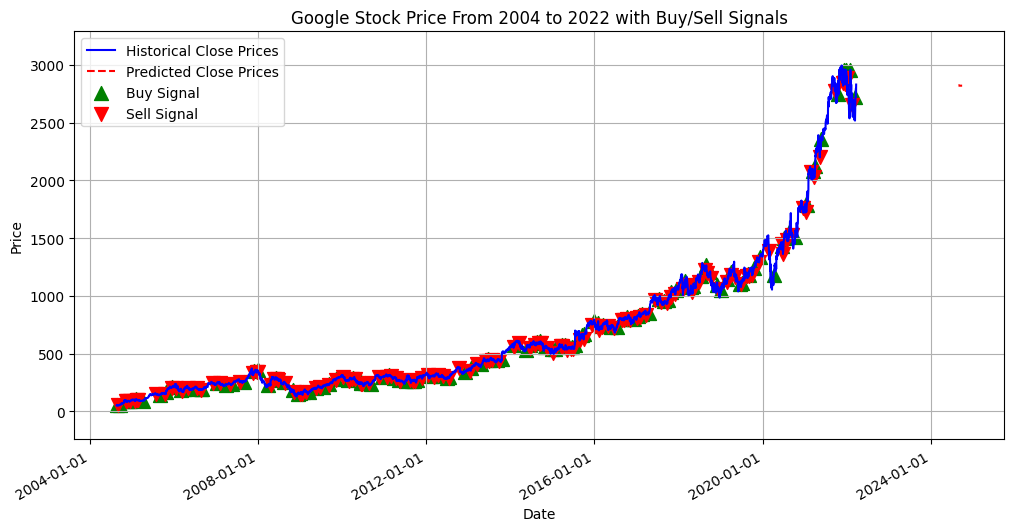

In [6]:
# Plot historical and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], close_prices, label='Historical Close Prices', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Predicted Close Prices', linestyle='--', color='red')

# Plot Buy/Sell signals
plt.scatter(df['Date'][buy_signals], close_prices[buy_signals], marker='^', color='green', label='Buy Signal', s=100)  # Green up-triangle for buy signals
plt.scatter(df['Date'][sell_signals], close_prices[sell_signals], marker='v', color='red', label='Sell Signal', s=100)  # Red down-triangle for sell signals

# Set x-axis major ticks to automatic date locator
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Formatting the x-axis for better readability
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

# Calculate dynamic y-axis limits
min_y = min(close_prices.min(), forecast_series.min())
max_y = max(close_prices.max(), forecast_series.max())
y_margin = (max_y - min_y) * 0.1  # Add margin for better visualization
plt.ylim(min_y - y_margin, max_y + y_margin)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Price From 2004 to 2022 with Buy/Sell Signals')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


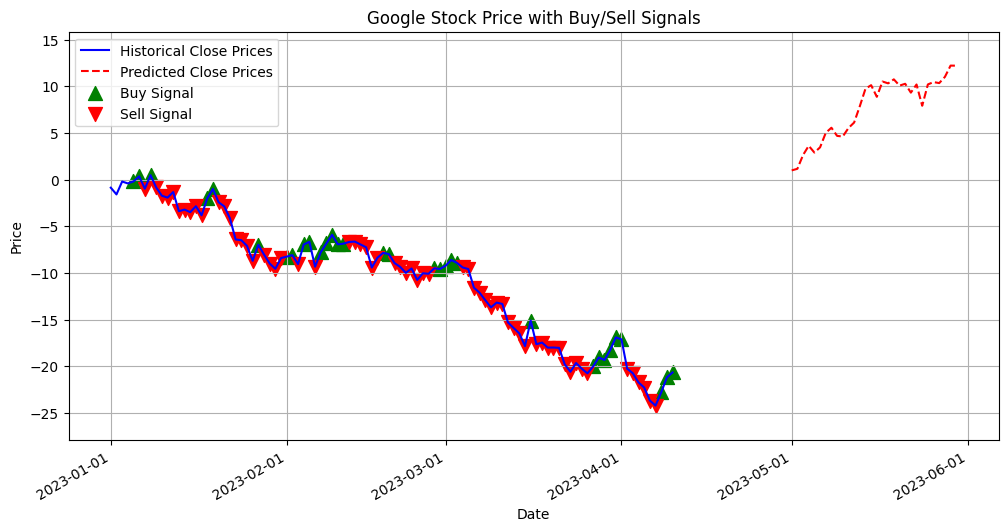

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Close': np.random.randn(100).cumsum()
})
forecast_series = pd.Series(data=np.random.randn(30).cumsum(), index=pd.date_range(start='2023-05-01', periods=30))

# Plot historical and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Prices', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Predicted Close Prices', linestyle='--', color='red')

# Plot Buy/Sell signals (example)
buy_signals = df['Close'] > df['Close'].rolling(window=5).mean()  # Example condition
sell_signals = df['Close'] < df['Close'].rolling(window=5).mean()  # Example condition
plt.scatter(df['Date'][buy_signals], df['Close'][buy_signals], marker='^', color='green', label='Buy Signal', s=100)  # Green up-triangle for buy signals
plt.scatter(df['Date'][sell_signals], df['Close'][sell_signals], marker='v', color='red', label='Sell Signal', s=100)  # Red down-triangle for sell signals

# Set x-axis major ticks to automatic date locator
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Formatting the x-axis for better readability
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

# Calculate dynamic y-axis limits
min_y = min(df['Close'].min(), forecast_series.min())
max_y = max(df['Close'].max(), forecast_series.max())
y_margin = (max_y - min_y) * 0.1  # Add margin for better visualization
plt.ylim(min_y - y_margin, max_y + y_margin)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Price with Buy/Sell Signals')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


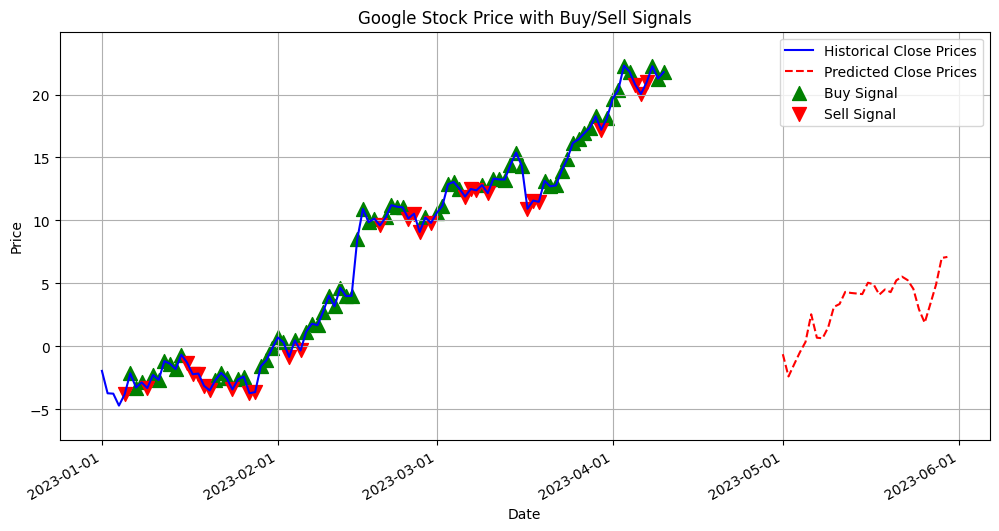

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import mplcursors

# Generate example data
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Close': np.random.randn(100).cumsum()
})
forecast_series = pd.Series(data=np.random.randn(30).cumsum(), index=pd.date_range(start='2023-05-01', periods=30))

# Plot historical and forecasted data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Date'], df['Close'], label='Historical Close Prices', color='blue')
ax.plot(forecast_series.index, forecast_series, label='Predicted Close Prices', linestyle='--', color='red')

# Plot Buy/Sell signals (example)
buy_signals = df['Close'] > df['Close'].rolling(window=5).mean()  # Example condition
sell_signals = df['Close'] < df['Close'].rolling(window=5).mean()  # Example condition
ax.scatter(df['Date'][buy_signals], df['Close'][buy_signals], marker='^', color='green', label='Buy Signal', s=100)  # Green up-triangle for buy signals
ax.scatter(df['Date'][sell_signals], df['Close'][sell_signals], marker='v', color='red', label='Sell Signal', s=100)  # Red down-triangle for sell signals

# Set x-axis major ticks to automatic date locator
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Formatting the x-axis for better readability
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

# Calculate dynamic y-axis limits
min_y = min(df['Close'].min(), forecast_series.min())
max_y = max(df['Close'].max(), forecast_series.max())
y_margin = (max_y - min_y) * 0.1  # Add margin for better visualization
ax.set_ylim(min_y - y_margin, max_y + y_margin)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Google Stock Price with Buy/Sell Signals')
ax.legend()
ax.grid(True)

# Enable interactive zoom and inspection
mplcursors.cursor(hover=True)

# Show the plot
plt.show()
